In [2]:
import numpy as np
import matplotlib.pyplot as plt
import firtez_dz as frz
from astropy.io import fits
from scipy.ndimage import gaussian_filter

In [3]:
plt.rc('text', usetex = False)

This file contains the stokes profile produced by Firtez using the atmosphere of the 4k sunspot simulation. \
Since the files are too large, we divided the 4k into 4 2k parts and z to 192. We generated both the 6173 line and 6301,2 lines (corresponding to HMI and Hinode,respectively). \
inversion with the two lines seperately. \
interpolate tau and compare Bz produced by inversion codes and the atoms to find which tau surface we are looking at. (-1.3) \
for HMI \
apply airy disk PSF, bin to pixel size of HMI, inversion with 6173 line. (3-5% in Bz) \
replace PSF with the HMI PSF from Len Yeo (2013). (9-12% in Bz)


In [47]:
stokes = frz.read_profile("stokes_test.bin")

In [28]:
stokes.stki.shape

(203, 256, 256)

In [29]:
mean = np.mean(stokes.stki,axis=(1,2))

In [63]:
stokes.wave

array([-500., -490., -480., -470., -460., -450., -440., -430., -420.,
       -410., -400., -390., -380., -370., -360., -350., -340., -330.,
       -320., -310., -300., -290., -280., -270., -260., -250., -240.,
       -230., -220., -210., -200., -190., -180., -170., -160., -150.,
       -140., -130., -120., -110., -100.,  -90.,  -80.,  -70.,  -60.,
        -50.,  -40.,  -30.,  -20.,  -10.,    0.,   10.,   20.,   30.,
         40.,   50.,   60.,   70.,   80.,   90.,  100.,  110.,  120.,
        130.,  140.,  150.,  160.,  170.,  180.,  190.,  200.,  210.,
        220.,  230.,  240.,  250.,  260.,  270.,  280.,  290.,  300.,
        310.,  320.,  330.,  340.,  350.,  360.,  370.,  380.,  390.,
        400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500., -500., -490., -480., -470., -460., -450., -440.,
       -430., -420., -410., -400., -390., -380., -370., -360., -350.,
       -340., -330., -320., -310., -300., -290., -280., -270., -260.,
       -250., -240.,

In [48]:
atmos = frz.read_model('out_atm_test.bin')

In [45]:
atmos.bz.shape

(256, 256, 256)

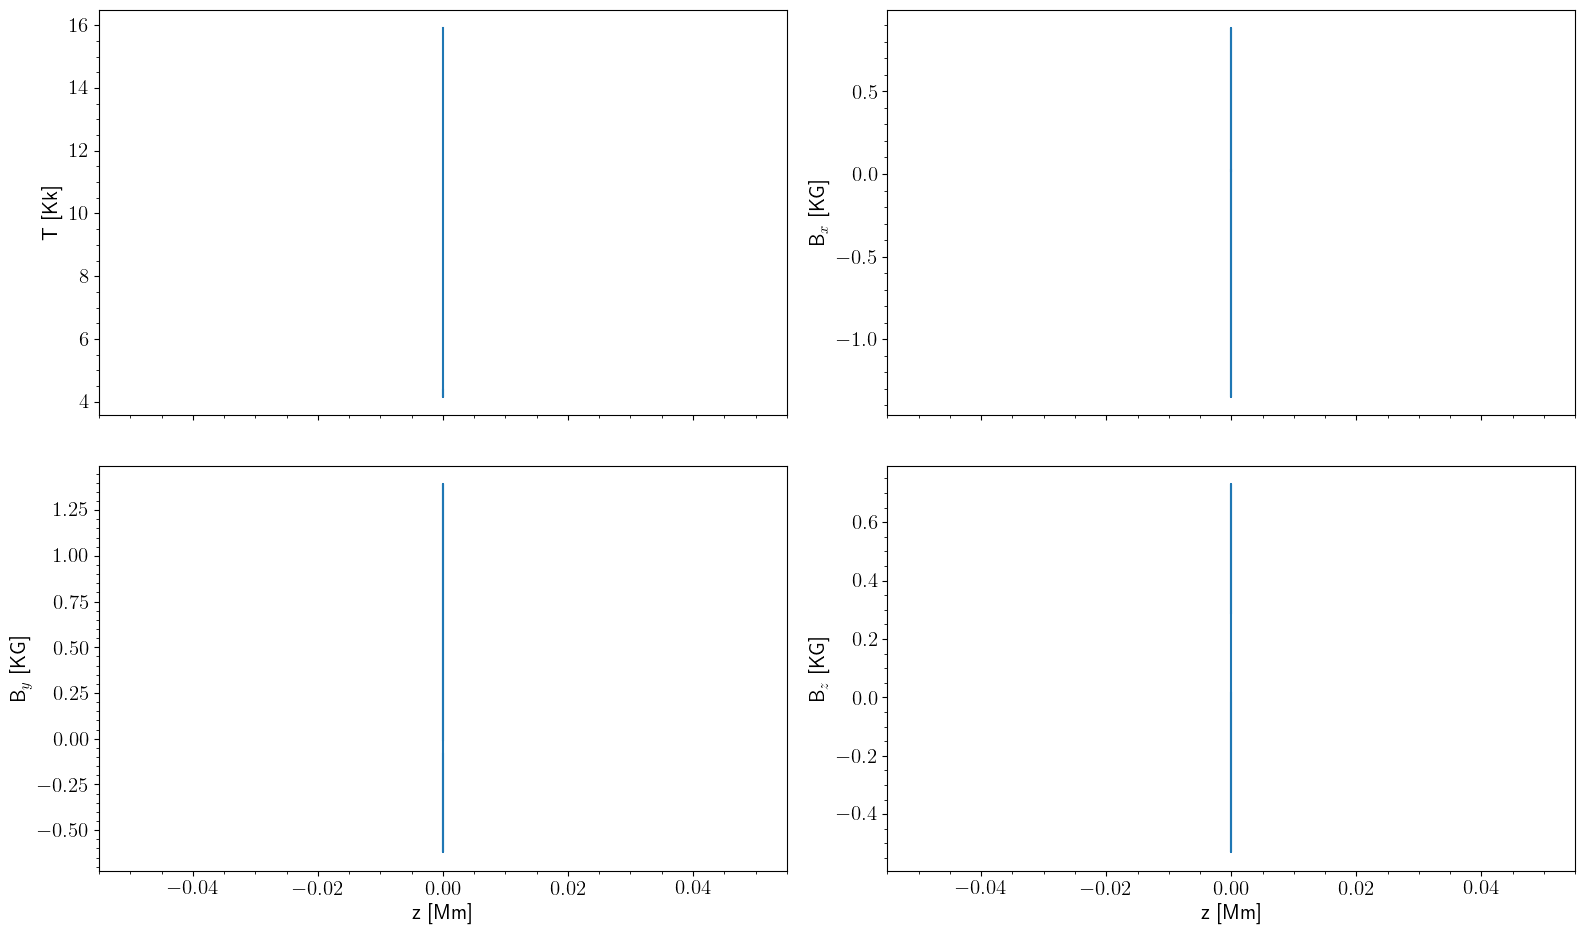

In [46]:
frz.plot_models([atmos],pars=['tem','bx','by','bz'],axis='z')

In [49]:
atm = frz.read_model('atm.bin')

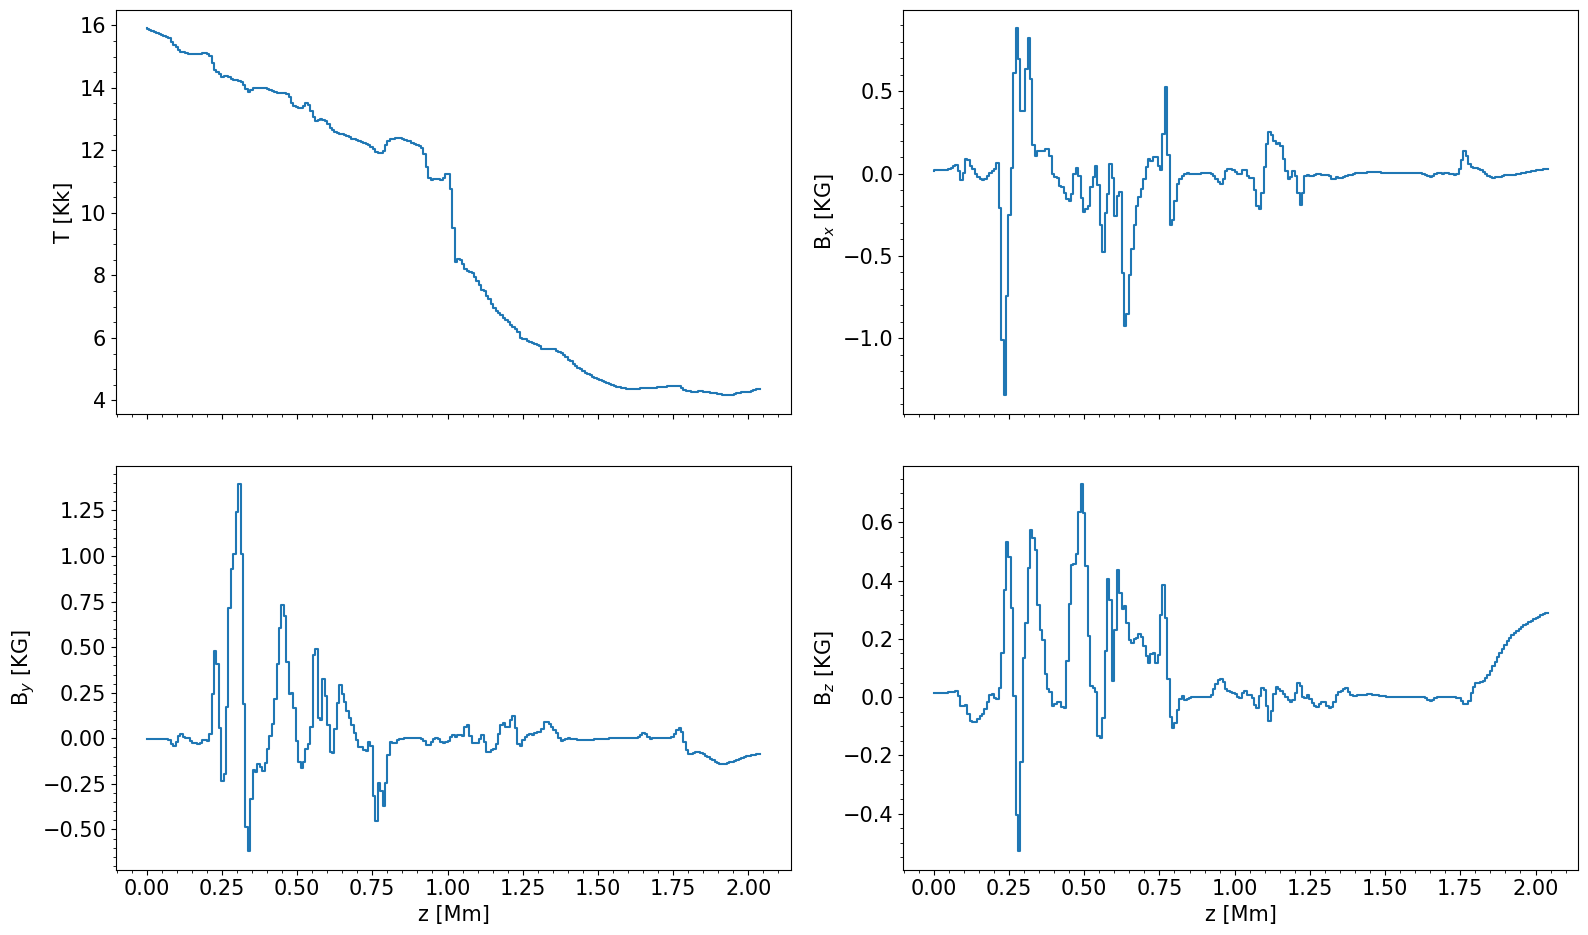

In [30]:
frz.plot_models([atm],pars=['tem','bx','by','bz'],axis='z')

In [72]:
stokes = frz.read_profile("stokes_1024x1024x256.bin")

In [10]:
stok.stki.shape

(152, 1024, 1024)

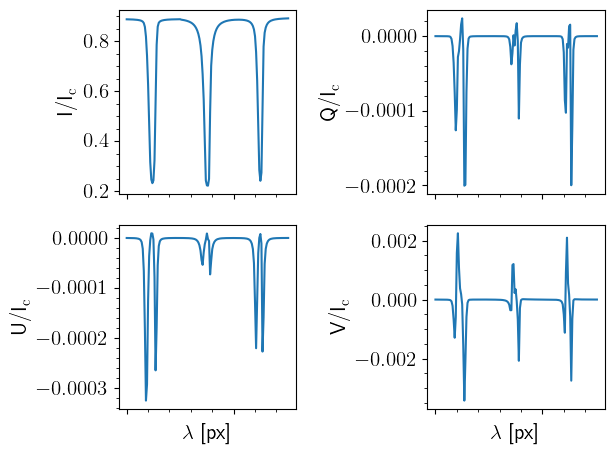

In [3]:
frz.plot_profiles([stok],pars=['all'],axis='p')

In [80]:
ll1 = 6173.3354 - 0.3 + np.arange(51) * 12 / 1000
ll2 = 6301.5012 - 0.5 + np.arange(101) * 20 / 1000
ll3 = np.append(ll1, ll2)

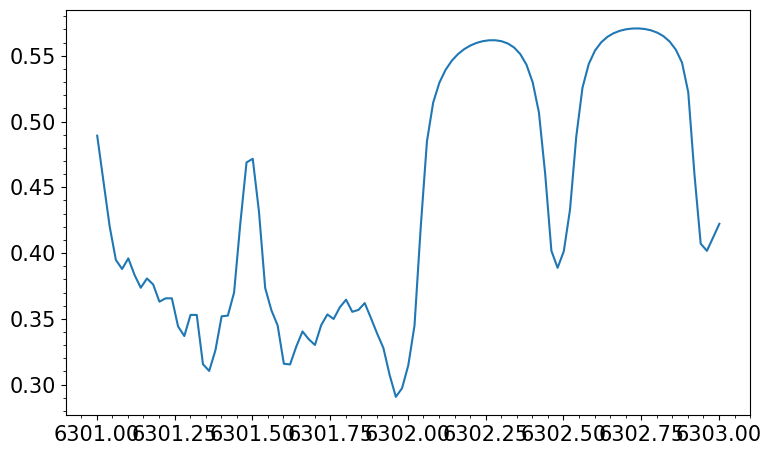

In [201]:
plt.plot(ll2,stokes.stki[51:,800,800])
plt.tight_layout()
#plt.plot(stok.stkv[:,950,950]/stok.stki[51,950,700])

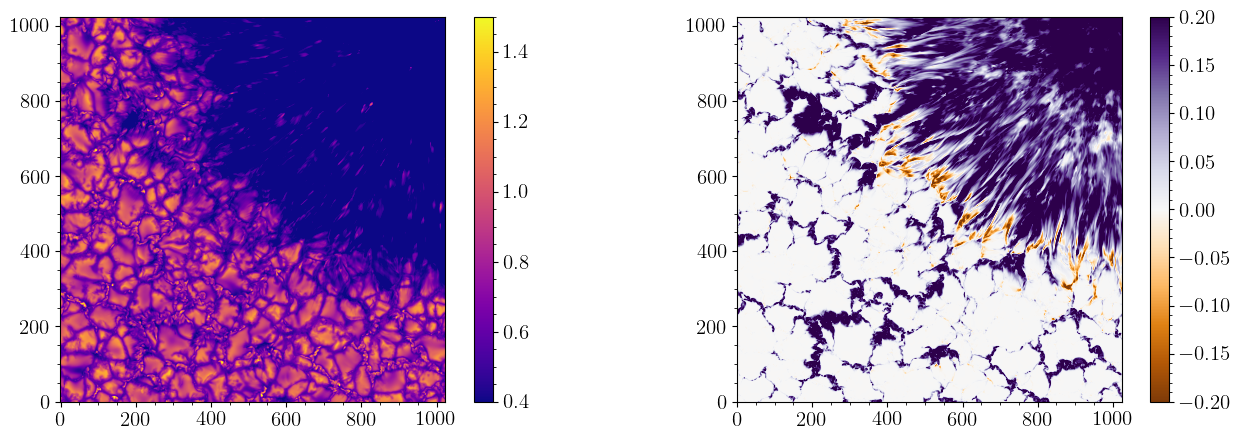

In [36]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(stok.stki[70,:,:].T,cmap="plasma",origin="lower",vmin=0.4,vmax=1.5)
plt.colorbar()
plt.subplot(122)
plt.imshow(stok.stkv[65,:,:].T/stok.stki[0,:,:].T,cmap="PuOr",origin="lower",vmin=-0.2,vmax=0.2)
plt.colorbar()

In [28]:
atm2=frz.read_model('/home/xenosh/codes/flux_exp/firtez_test/out_atm_1024x1024x256_tau.bin')

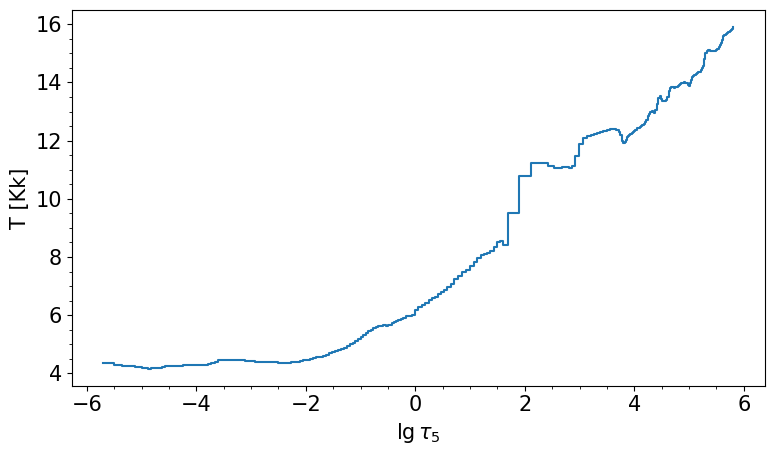

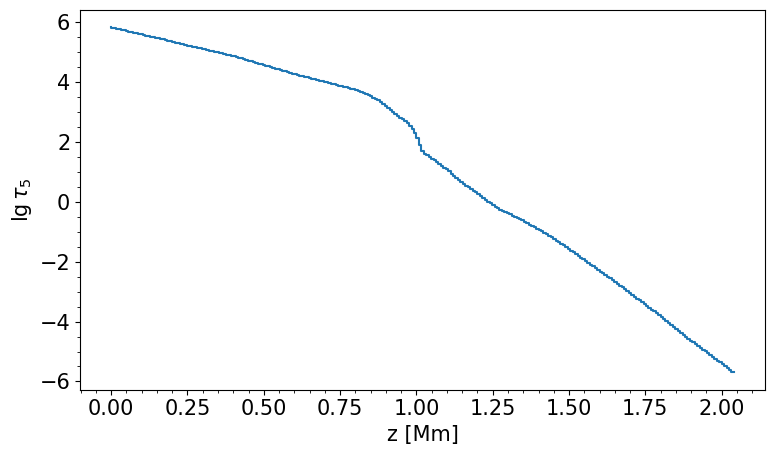

In [132]:
frz.plot_models([atm2],pars=['tem'],fnum=0,itx=[0],ity=[0],axis='t')
frz.plot_models([atm2],pars=['tau'],fnum=1,axis='z')

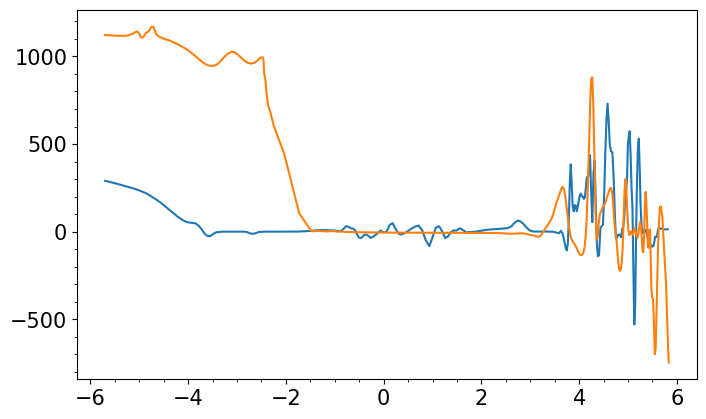

In [91]:
plt.plot(atm2.tau[0,0], atm2.bz[0,0])
plt.plot(atm2.tau[500,500], atm2.bz[500,500])


In [30]:
tau_common = np.linspace(-3,1,41)
tau_common

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [7]:
tau_common.shape[0]

41

In [8]:
a=np.zeros((1024,1024,41))
a[:,:,:]=tau_common[None,None,:]
a=None

Text(0.5, 0, '$log \\tau$')

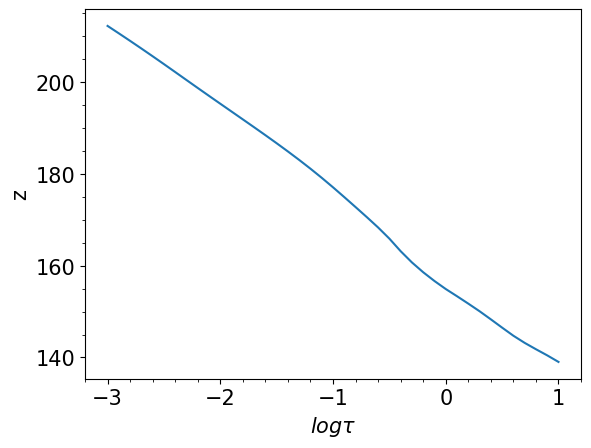

In [11]:
Z_interp = np.interp(tau_common, atm2.tau[0,0,::-1], atm2.z[0,0,::-1])
plt.plot(tau_common, Z_interp/8)
plt.ylabel('z')
plt.xlabel(r'$log \tau$')

In [12]:
Z_interp

array([1697.68138252, 1684.72403166, 1671.61122978, 1658.30552703,
       1644.79706646, 1631.1232152 , 1617.30699955, 1603.40817962,
       1589.54779101, 1575.78111521, 1562.10226282, 1548.46067245,
       1534.82385861, 1521.14080515, 1507.31511493, 1493.26855907,
       1478.91120845, 1464.15714732, 1448.88514348, 1433.00070639,
       1416.46774069, 1399.3920327 , 1382.04258619, 1364.50731327,
       1346.49906962, 1327.04314457, 1305.15778624, 1285.58899741,
       1268.48750436, 1253.21264158, 1239.2768086 , 1226.69548676,
       1213.81755057, 1200.55700962, 1186.43656048, 1172.00270317,
       1157.89212508, 1145.46117758, 1134.37511784, 1123.69644863,
       1112.26291826])

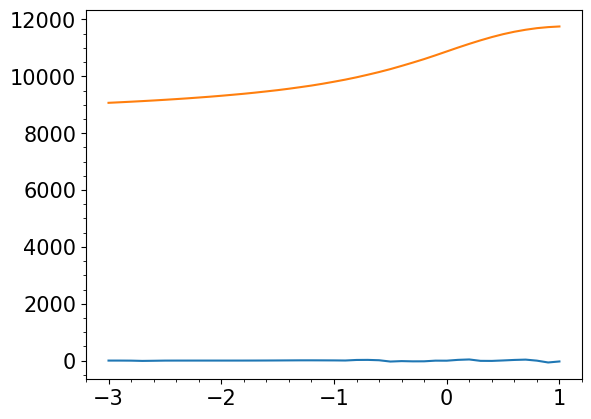

In [31]:
# Now interpolate a given pixel to this new grid: 

Bz1_interp = np.interp(tau_common, atm2.tau[0,0,::-1], atm2.bz[0,0,::-1])
Bz2_interp = np.interp(tau_common, atm2.tau[1000,1000,::-1], atm2.bz[1000,1000,::-1])

plt.plot(tau_common, Bz1_interp)
plt.plot(tau_common, Bz2_interp)

In [15]:
Bz1_interp[30]

-3.754810751701613

In [34]:
Bz_interp = np.zeros((1024,1024,41))
for i in range(1024):
    for j in range(1024):
        Bz_interp[i,j,:] = np.interp(tau_common, atm2.tau[i,j,::-1], atm2.bz[i,j,::-1])

In [35]:
Bz_interp.shape

(1024, 1024, 41)

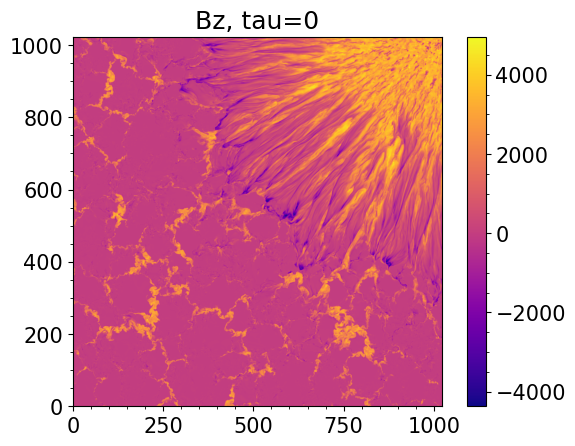

In [58]:
plt.imshow(Bz_interp[:,:,40]/np.sqrt(4*np.pi),origin='lower',cmap='plasma')
plt.title('Bz, tau=0')
plt.colorbar()

Text(0, 0.5, '$log \\tau$')

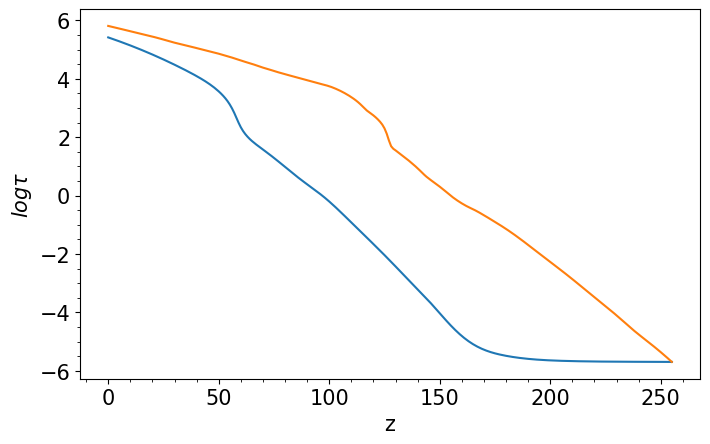

In [188]:
plt.plot(atm2.tau[1000,1000])
plt.plot(atm2.tau[0,0])
plt.xlabel('z')
plt.ylabel(r'$log \tau$')

In [118]:
model = fits.open('/home/xenosh/codes/flux_exp/firtez_test/stokes_1024x1024x256_inverted_6301.fits')[0].data

In [119]:
Bz = model[:,:,0]*np.cos(model[:,:,1])

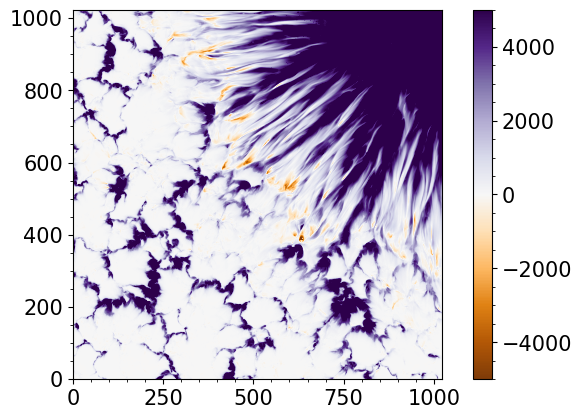

In [120]:
plt.imshow(Bz,origin ='lower',cmap='PuOr',vmin=-5000,vmax=5000)
plt.colorbar()

In [43]:
Bh = model[:,:,0]*np.sin(model[:,:,2])

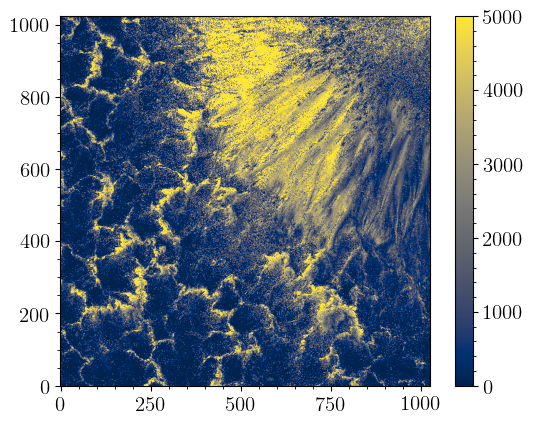

In [44]:
plt.imshow(Bh[:,:],cmap='cividis',origin='lower',vmax=5000)
plt.colorbar()

In [2]:
atm = frz.read_model('/home/xenosh/codes/flux_exp/firtez_test/atm_1024x1024x256.bin')

In [103]:
stok = frz.read_profile('/home/xenosh/codes/flux_exp/firtez_test/test_6173/stokes.bin')

In [104]:
model2 = fits.open('/home/xenosh/codes/flux_exp/firtez_test/test_6173/stokes_inverted_6173.fits')[0].data

In [105]:
syn_out2 = fits.open('/home/xenosh/codes/flux_exp/firtez_test/test_6173/stokes_inverted_6173.fits')[1].data

In [106]:
Bz2 = model2[:,:,0]*np.cos(model2[:,:,1])

In [7]:
syn_out2.shape

(1024, 1024, 4, 201)

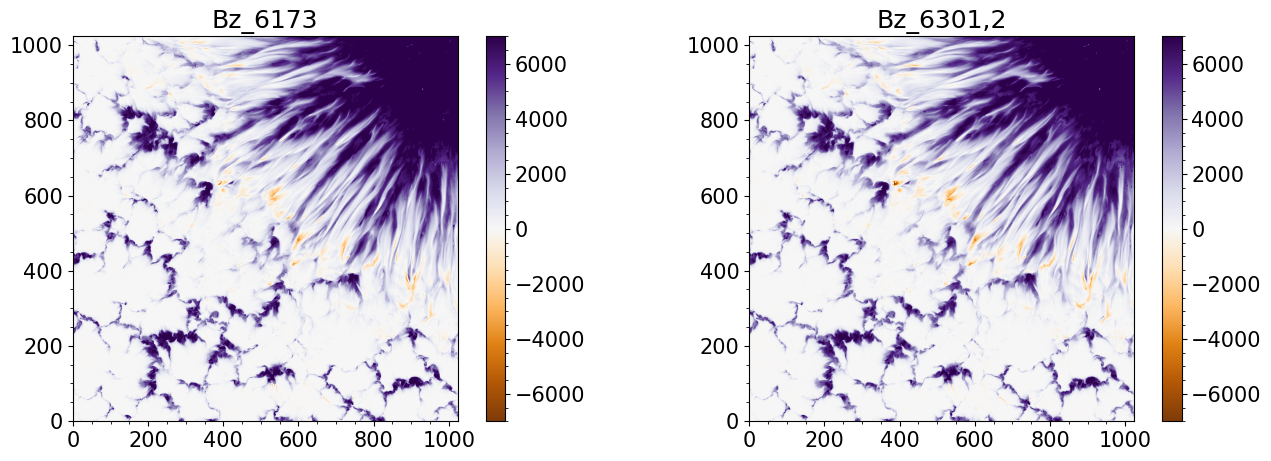

In [122]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(Bz2.T,origin ='lower',cmap='PuOr',vmin=-7000,vmax=7000)
plt.title('Bz_6173')
plt.colorbar()
plt.subplot(122)
plt.imshow(Bz.T,origin ='lower',cmap='PuOr',vmin=-7000,vmax=7000)
plt.title('Bz_6301,2')
plt.colorbar()

In [123]:
print(np.mean(Bz2[800:,800:]))
print(np.mean(Bz[800:,800:,]))
print(1-(np.mean(Bz2[800:,800:])/np.mean(Bz[800:,800:,])))

8715.66447985896
8544.812912602627
-0.01999476980992143


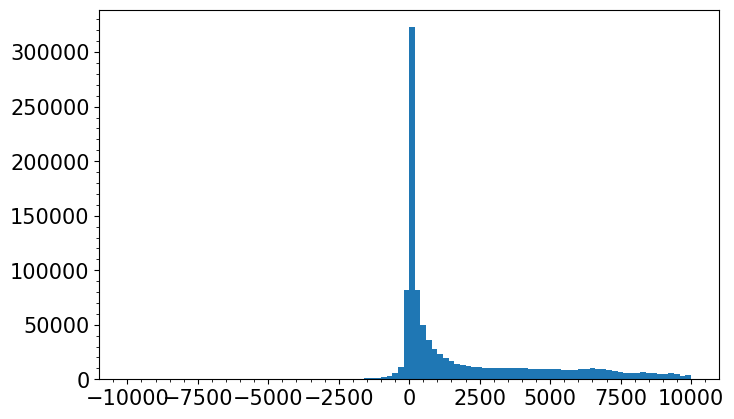

In [197]:
plt.hist(Bz2.flatten(),bins=100)
plt.show()

In [24]:
atm.bz.shape

(1024, 1024, 256)

In [12]:
ll = 6173.3354 - 1. + np.arange(201) * 10 / 1000

In [28]:
z = np.arange(256)

9784.561164483748


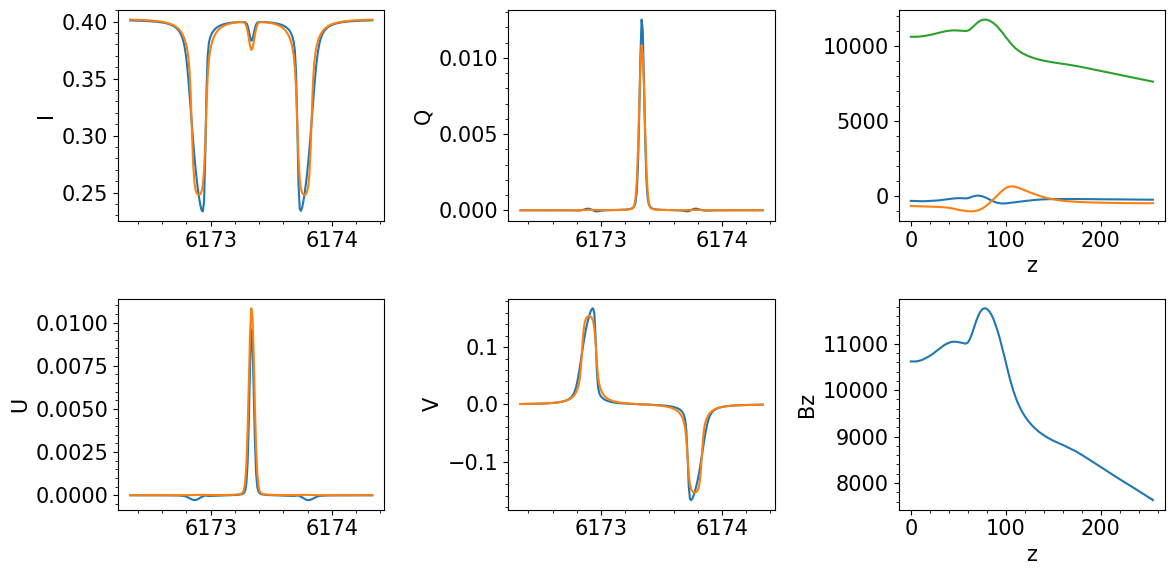

In [109]:
plt.figure(figsize=[12,6])
plt.subplot(231)
plt.plot(ll,stok.stki[:,1000,1000])
plt.plot(ll,syn_out2[1000,1000,0,:])
plt.ylabel('I')
plt.subplot(232)
plt.plot(ll,stok.stkq[:,1000,1000])
plt.plot(ll,syn_out2[1000,1000,1,:])
plt.ylabel('Q')
plt.subplot(233)
plt.plot(z, atm.bx[1000,1000,:])
plt.plot(z, atm.by[1000,1000,:])
plt.plot(z, atm.bz[1000,1000,:])
plt.xlabel('z')
plt.subplot(234)
plt.plot(ll,stok.stku[:,1000,1000])
plt.plot(ll,syn_out2[1000,1000,1,:])
plt.ylabel('U')
plt.subplot(235)
plt.plot(ll,stok.stkv[:,1000,1000])
plt.plot(ll,syn_out2[1000,1000,3,:])
plt.ylabel('V')
plt.subplot(236)
plt.plot(z, atm.bz[1000,1000,:])
plt.xlabel('z')
plt.ylabel('Bz')
plt.tight_layout()
print(Bz2[1000,1000])

5389.085439947921


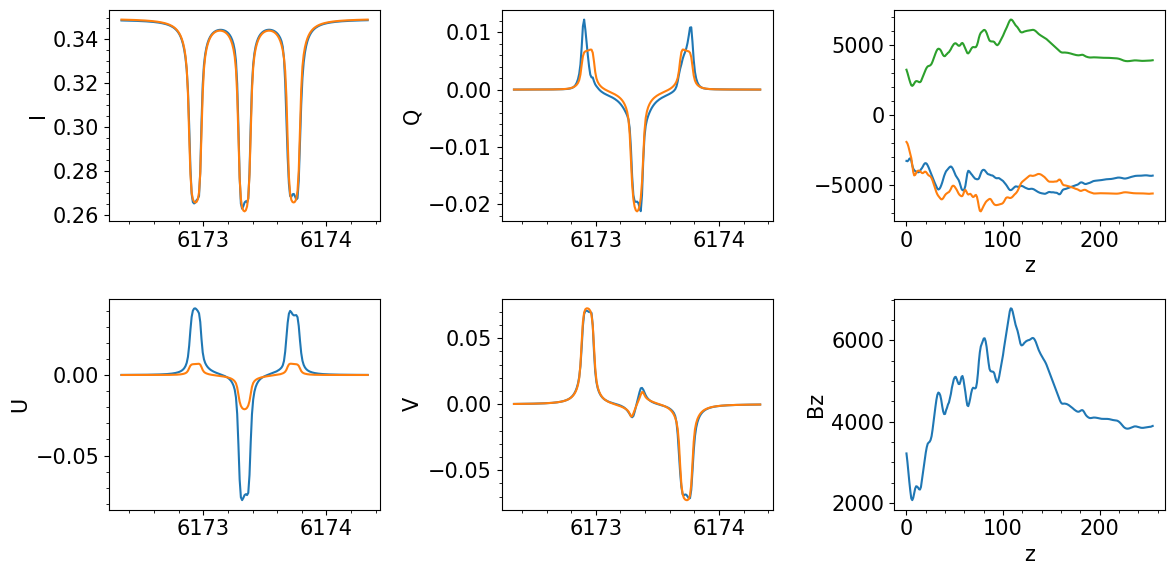

In [110]:
plt.figure(figsize=[12,6])
plt.subplot(231)
plt.plot(ll,stok.stki[:,800,700])
plt.plot(ll,syn_out2[800,700,0,:])
plt.ylabel('I')
plt.subplot(232)
plt.plot(ll,stok.stkq[:,800,700])
plt.plot(ll,syn_out2[800,700,1,:])
plt.ylabel('Q')
plt.subplot(233)
plt.plot(z, atm.bx[800,700,:])
plt.plot(z, atm.by[800,700,:])
plt.plot(z, atm.bz[800,700,:])
plt.xlabel('z')
plt.subplot(234)
plt.plot(ll,stok.stku[:,800,700])
plt.plot(ll,syn_out2[800,700,1,:])
plt.ylabel('U')
plt.subplot(235)
plt.plot(ll,stok.stkv[:,800,700])
plt.plot(ll,syn_out2[800,700,3,:])
plt.ylabel('V')
plt.subplot(236)
plt.plot(z, atm.bz[800,700,:])
plt.xlabel('z')
plt.ylabel('Bz')
plt.tight_layout()
print(Bz2[800,700])

1176.5897275508564


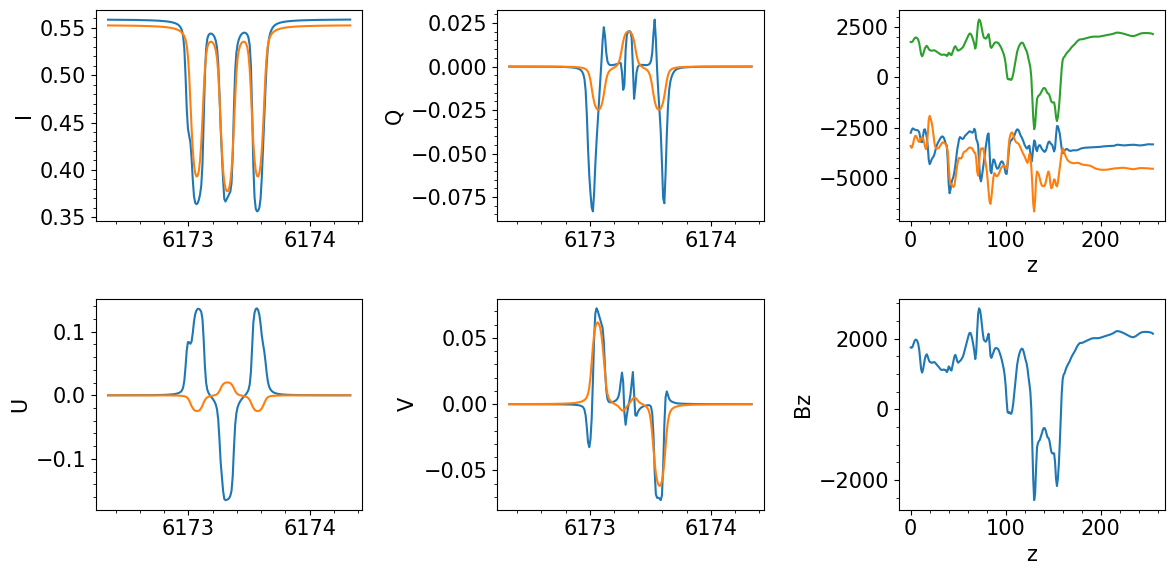

In [116]:
plt.figure(figsize=[12,6])
plt.subplot(231)
plt.plot(ll,stok.stki[:,700,600])
plt.plot(ll,syn_out2[700,600,0,:])
plt.ylabel('I')
plt.subplot(232)
plt.plot(ll,stok.stkq[:,700,600])
plt.plot(ll,syn_out2[700,600,1,:])
plt.ylabel('Q')
plt.subplot(233)
plt.plot(z, atm.bx[700,600,:])
plt.plot(z, atm.by[700,600,:])
plt.plot(z, atm.bz[700,600,:])
plt.xlabel('z')
plt.subplot(234)
plt.plot(ll,stok.stku[:,700,600])
plt.plot(ll,syn_out2[700,600,1,:])
plt.ylabel('U')
plt.subplot(235)
plt.plot(ll,stok.stkv[:,700,600])
plt.plot(ll,syn_out2[700,600,3,:])
plt.ylabel('V')
plt.subplot(236)
plt.plot(z, atm.bz[700,600,:])
plt.xlabel('z')
plt.ylabel('Bz')
plt.tight_layout()
print(Bz2[700,600])

-11.6928699455006


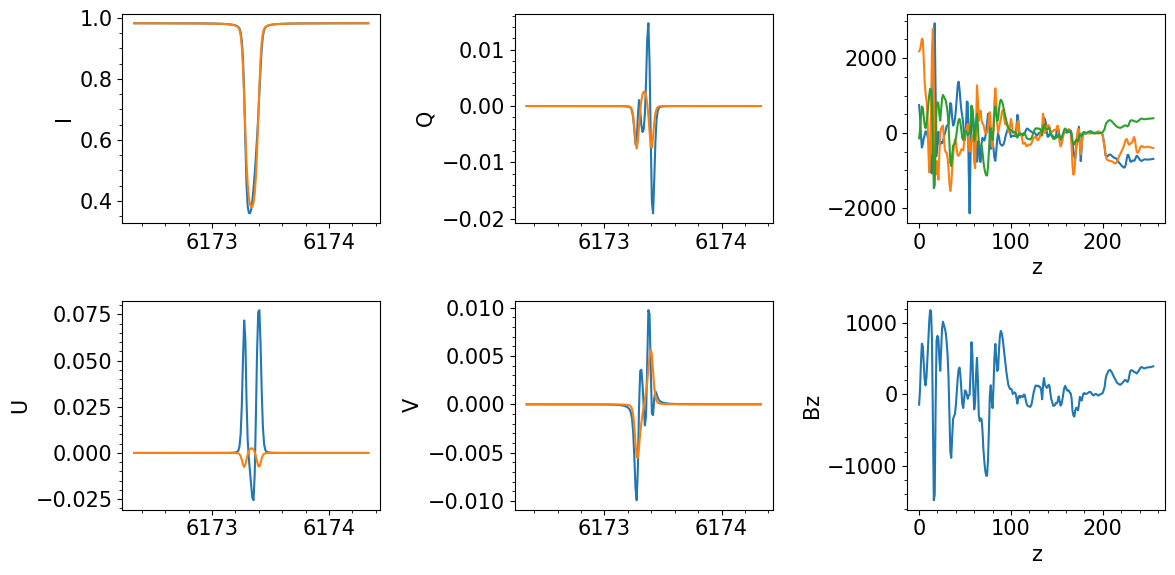

In [112]:
plt.figure(figsize=[12,6])
plt.subplot(231)
plt.plot(ll,stok.stki[:,100,100])
plt.plot(ll,syn_out2[100,100,0,:])
plt.ylabel('I')
plt.subplot(232)
plt.plot(ll,stok.stkq[:,100,100])
plt.plot(ll,syn_out2[100,100,1,:])
plt.ylabel('Q')
plt.subplot(233)
plt.plot(z, atm.bx[100,100,:])
plt.plot(z, atm.by[100,100,:])
plt.plot(z, atm.bz[100,100,:])
plt.xlabel('z')
plt.subplot(234)
plt.plot(ll,stok.stku[:,100,100])
plt.plot(ll,syn_out2[100,100,1,:])
plt.ylabel('U')
plt.subplot(235)
plt.plot(ll,stok.stkv[:,100,100])
plt.plot(ll,syn_out2[100,100,3,:])
plt.ylabel('V')
plt.subplot(236)
plt.plot(z, atm.bz[100,100,:])
plt.xlabel('z')
plt.ylabel('Bz')
plt.tight_layout()
print(Bz2[100,100])

8728.938229622701


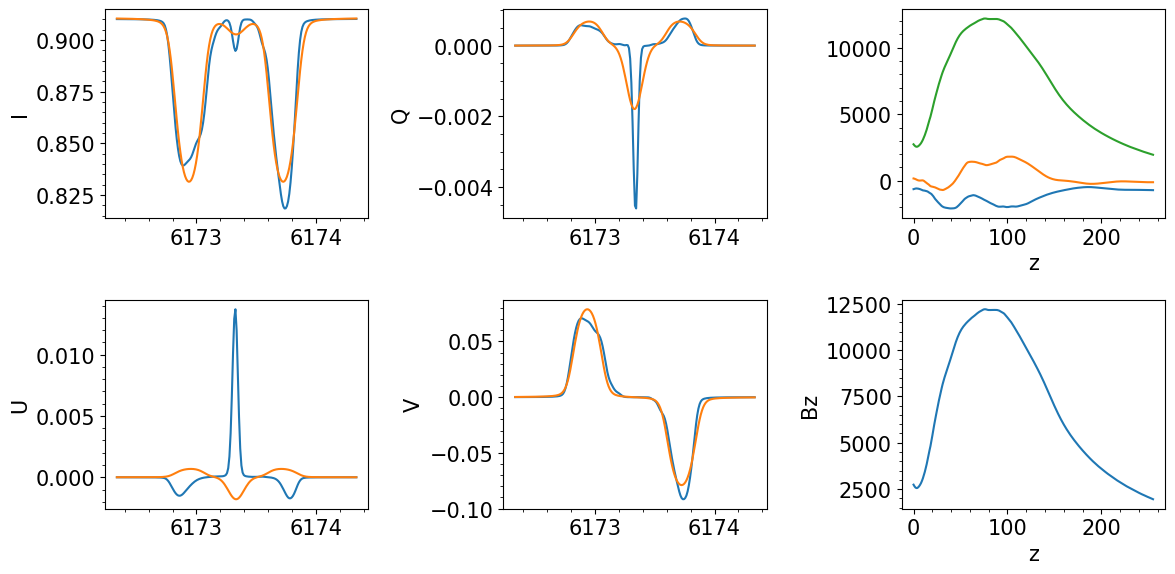

In [113]:
plt.figure(figsize=[12,6])
plt.subplot(231)
plt.plot(ll,stok.stki[:,250,220])
plt.plot(ll,syn_out2[250,220,0,:])
plt.ylabel('I')
plt.subplot(232)
plt.plot(ll,stok.stkq[:,250,220])
plt.plot(ll,syn_out2[250,220,1,:])
plt.ylabel('Q')
plt.subplot(233)
plt.plot(z, atm.bx[250,220,:])
plt.plot(z, atm.by[250,220,:])
plt.plot(z, atm.bz[250,220,:])
plt.xlabel('z')
plt.subplot(234)
plt.plot(ll,stok.stku[:,250,220])
plt.plot(ll,syn_out2[250,220,2,:])
plt.ylabel('U')
plt.subplot(235)
plt.plot(ll,stok.stkv[:,250,220])
plt.plot(ll,syn_out2[250,220,3,:])
plt.ylabel('V')
plt.subplot(236)
plt.plot(z, atm.bz[250,220,:])
plt.xlabel('z')
plt.ylabel('Bz')
plt.tight_layout()
print(Bz2[250,220])

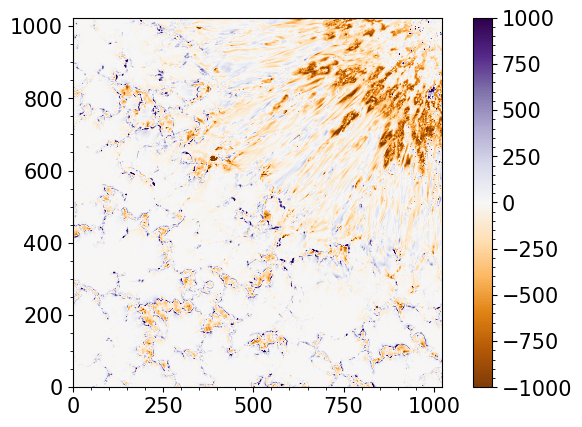

In [124]:
plt.imshow(Bz.T-Bz2.T,origin ='lower',cmap='PuOr',vmin=-1000,vmax=1000)
plt.colorbar()

In [13]:
stokes = frz.read_profile("/dat/xenosh/Full_simulation/stokes_10.bin")
stokes.stki.shape

(302, 2048, 2048)

In [35]:
ll1 = 6173.3354 - 0.5 + np.arange(101) * 10 / 1000
ll2 = 6301.5012 - 0.5 + np.arange(201) * 10 / 1000
ll = np.append(ll1, ll2)

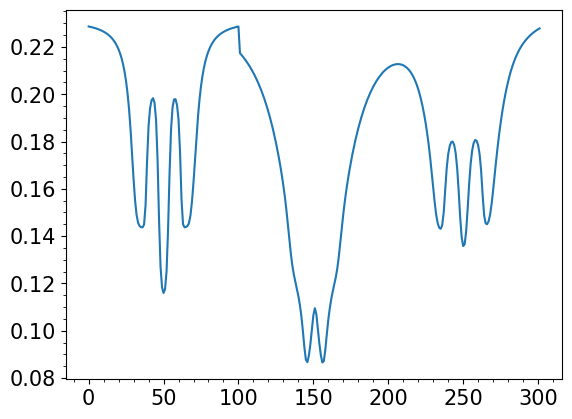

In [15]:
plt.plot(stokes.stki[:,100,1500])

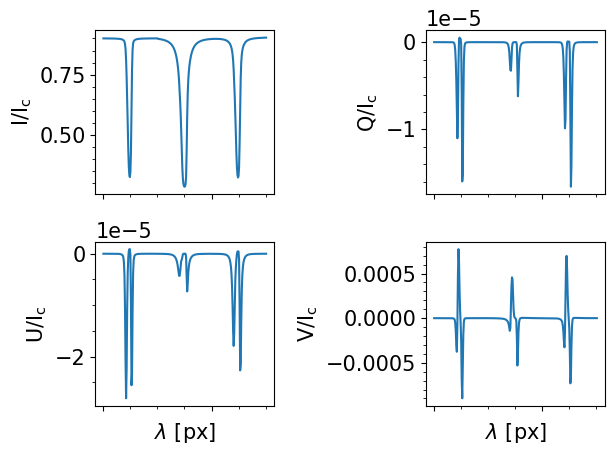

In [7]:
frz.plot_profiles([stokes],pars=['all'],axis='p')

In [59]:
test = frz.read_model('/home/xenosh/codes/flux_exp/firtez_test/atm_1024x1024x41_tau.bin')

In [60]:
test.bz.shape

(1024, 1024, 41)

In [ ]:
plt.imshow(test.bz[:,:,30],origin='lower',cmap='magma')
plt.colorbar()

In [9]:
model2 = fits.open('/dat/xenosh/Full_simulation/stokes_10_inverted_6301.fits')[0].data
syn_out2 = fits.open('/dat/xenosh/Full_simulation/stokes_10_inverted_6301.fits')[1].data

In [256]:
model = fits.open('/dat-old/xenosh/Full_simulation/stokes_full_converted_PSF_inverted_6301.fits')[0].data
syn_out = fits.open('/dat-old/xenosh/Full_simulation/stokes_full_converted_PSF_inverted_6301.fits')[1].data

In [48]:
model3 = fits.open('/dat/xenosh/Full_simulation/stokes_01_inverted_6301.fits')[1].data

In [64]:
model4 = fits.open('/dat/xenosh/Full_simulation/stokes_11_inverted_6301.fits')[0].data

In [ ]:
Bz2 = model2[:,:,0]*np.cos(model2[:,:,1])

In [354]:
Bz = model[:,:,0]*np.cos(model[:,:,1])

In [49]:
Bz3 = model3[:,:,0]*np.cos(model3[:,:,1])

In [56]:
Bh3 = model3[:,:,0]*np.sin(model3[:,:,1])

In [82]:
bz = np.append(np.append(Bz,Bz2,axis=0),np.append(Bz3,Bz4,axis=0),axis=1)
bz.shape

(4096, 4096)

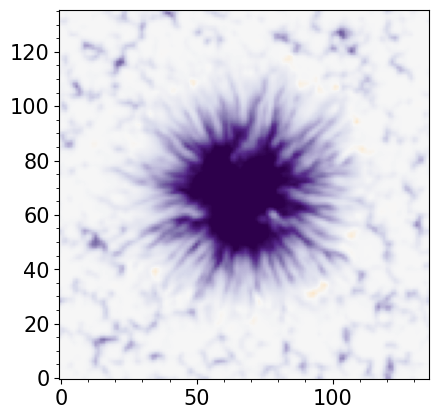

In [258]:
plt.imshow(Bz.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)

In [260]:
np.mean(np.abs(Bz))

490.99349326196125

In [66]:
Bz4 = model4[:,:,0]*np.cos(model4[:,:,1])
Bh4 = model4[:,:,0]*np.sin(model4[:,:,1])

In [ ]:
bz2 = np.append(Bz3,Bz4,axis=0)

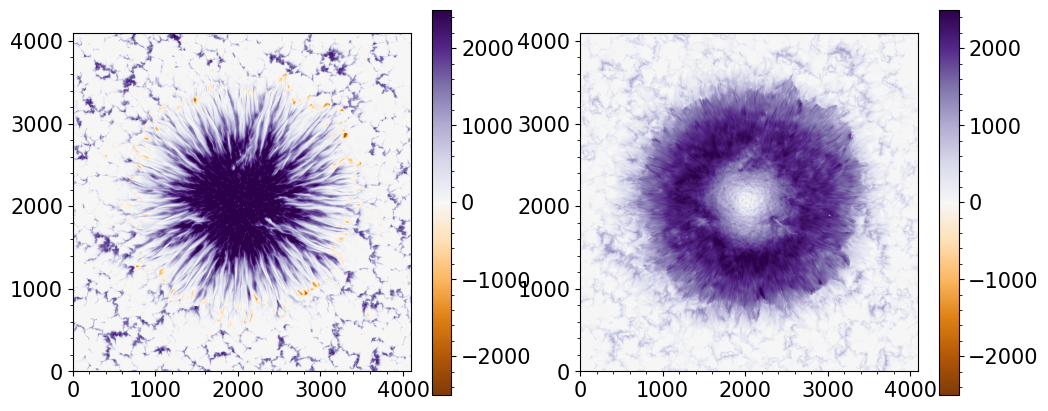

In [67]:
plt.figure(figsize=[12,5])
plt.subplot(121)
plt.imshow(np.append(np.append(Bz,Bz2,axis=0),np.append(Bz3,Bz4,axis=0),axis=1).T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()
plt.subplot(122)
plt.imshow(np.append(np.append(Bh,Bh2,axis=0),np.append(Bh3,Bh4,axis=0),axis=1).T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()

In [ ]:
bz = np.append(np.append(Bz,Bz2,axis=0),np.append(Bz3,Bz4,axis=0),axis=1)
bh = np.append(np.append(Bh,Bh2,axis=0),np.append(Bh3,Bh4,axis=0),axis=1)

In [ ]:
Bh2 = model2[:,:,0]*np.sin(model2[:,:,1])

In [277]:
Bh = model[:,:,0]*np.sin(model[:,:,1])

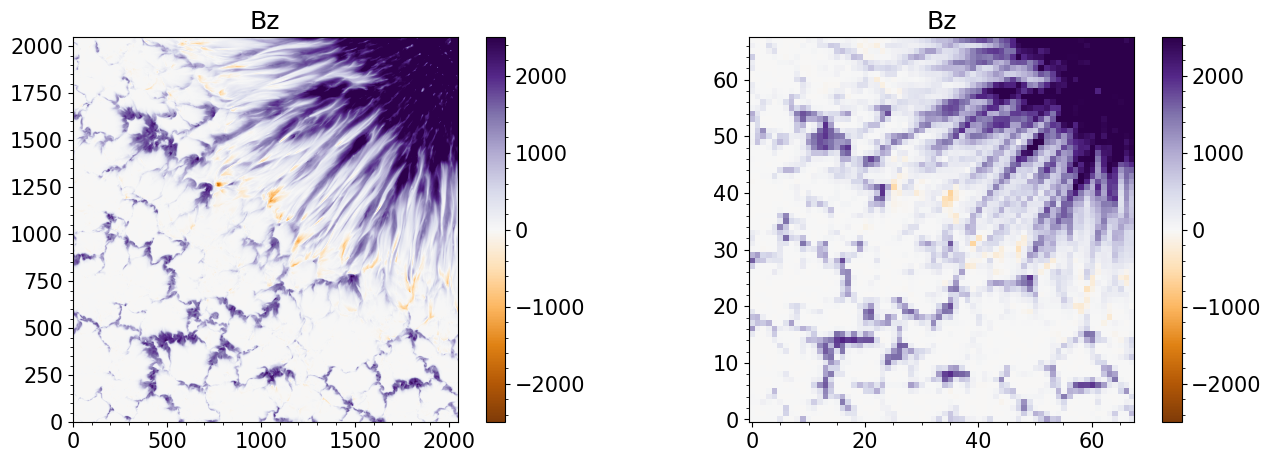

In [76]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(Bz.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bz')
plt.colorbar()
plt.subplot(122)
plt.imshow(Bz_new.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bz')
plt.colorbar()

In [46]:
Bx = model[:,:,0]*np.sin(model[:,:,1])*np.cos(model[:,:,2])
By = model[:,:,0]*np.sin(model[:,:,1])*np.sin(model[:,:,2])

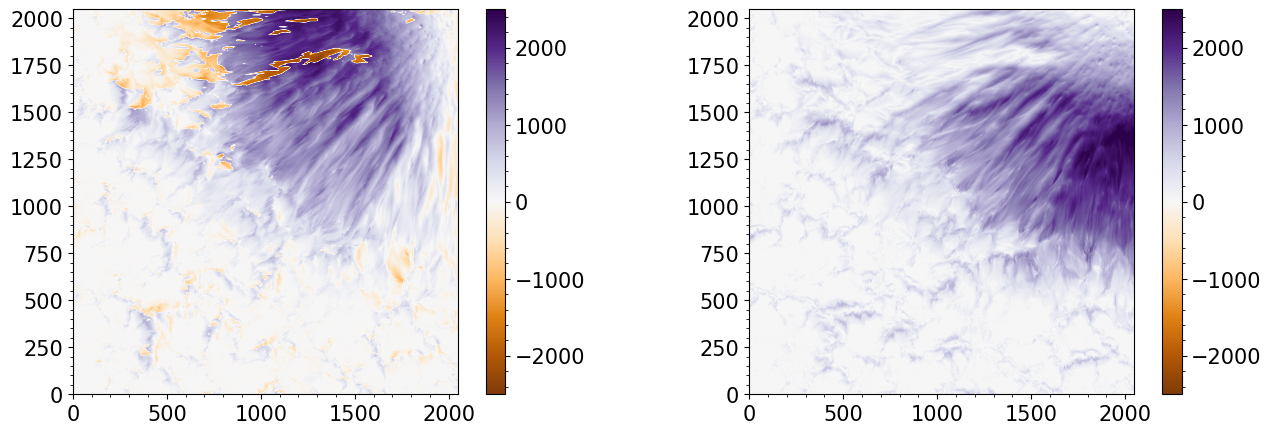

In [47]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(Bx.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
#plt.title('Bh_')
plt.colorbar()
plt.subplot(122)
plt.imshow(By.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
#plt.title('Bh_')
plt.colorbar()

In [19]:
np.mean(Bz[1700:,1700:])

2739.4005690856784

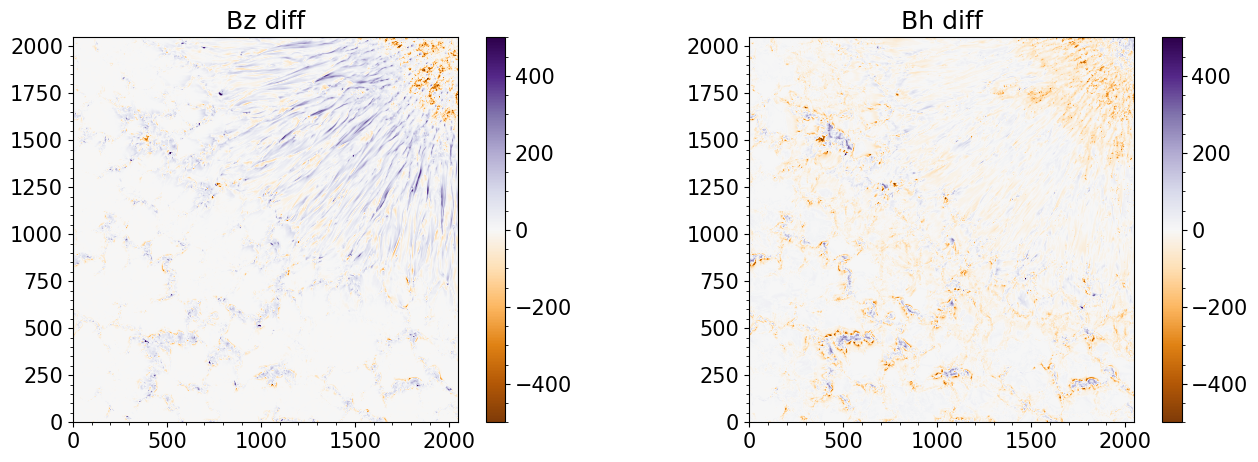

In [8]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(Bz.T-Bz2.T,origin ='lower',cmap='PuOr',vmin=-500,vmax=500)
plt.title('Bz diff')
plt.colorbar()
plt.subplot(122)
plt.imshow(Bh.T-Bh2.T,origin='lower',cmap='PuOr',vmin=-500,vmax=500)
plt.title('Bh diff')
plt.colorbar()

In [107]:
np.std(Bz3-Bz_interp[:,:,18]) #min at 17, log tau = -1.3, 124.9

151.6694005782157

In [99]:
np.sqrt(np.sum((Bz-Bz_interp[:,:,17])**2)/(2048*2048))

126.40283006901713

Text(0, 0.5, 'V')

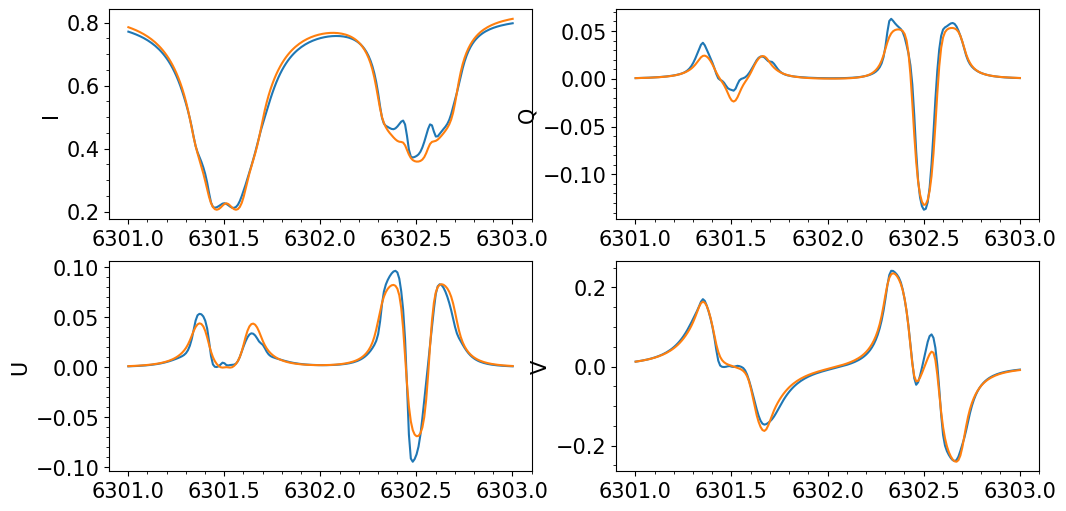

In [115]:
plt.figure(figsize=[12,6])
plt.subplot(221)
plt.plot(ll2,stokes.stki[101:,1500,1500])
plt.plot(ll2,syn_out2[1500,1500,0,:])
plt.ylabel('I')
plt.subplot(222)
plt.plot(ll2,stokes.stkq[101:,1500,1500])
plt.plot(ll2,syn_out2[1500,1500,1,:])
plt.ylabel('Q')
plt.subplot(223)
plt.plot(ll2,stokes.stku[101:,1500,1500])
plt.plot(ll2,syn_out2[1500,1500,2,:])
plt.ylabel('U')
plt.subplot(224)
plt.plot(ll2,stokes.stkv[101:,1500,1500])
plt.plot(ll2,syn_out2[1500,1500,3,:])
plt.ylabel('V')

Text(0, 0.5, 'V')

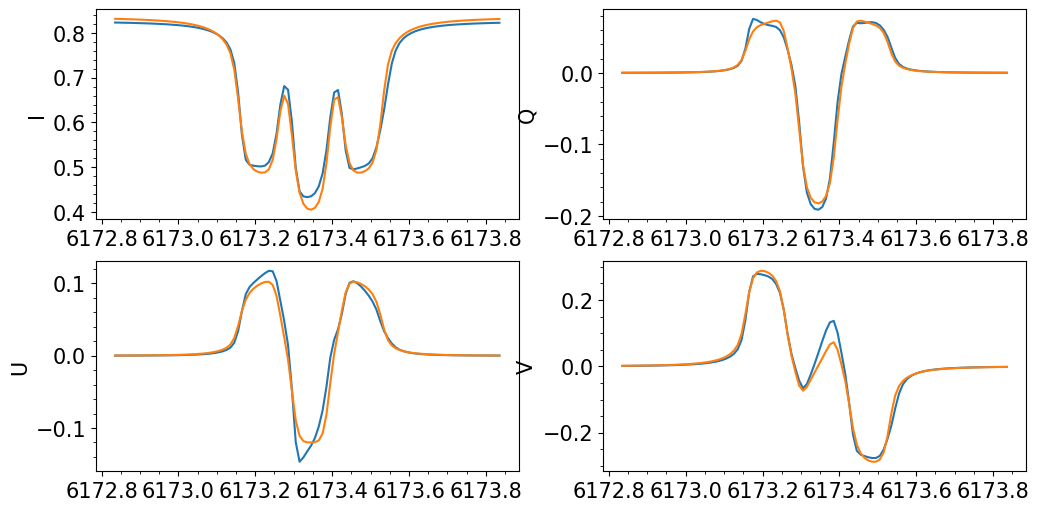

In [117]:
plt.figure(figsize=[12,6])
plt.subplot(221)
plt.plot(ll1,stokes.stki[:101,1500,1500])
plt.plot(ll1,syn_out[1500,1500,0,:])
plt.ylabel('I')
plt.subplot(222)
plt.plot(ll1,stokes.stkq[:101,1500,1500])
plt.plot(ll1,syn_out[1500,1500,1,:])
plt.ylabel('Q')
plt.subplot(223)
plt.plot(ll1,stokes.stku[:101,1500,1500])
plt.plot(ll1,syn_out[1500,1500,2,:])
plt.ylabel('U')
plt.subplot(224)
plt.plot(ll1,stokes.stkv[:101,1500,1500])
plt.plot(ll1,syn_out[1500,1500,3,:])
plt.ylabel('V')

In [ ]:
atm = frz.read_model('/dat/xenosh/Full_simulation/out_atm_2048x2048x192_00_tau.bin')

In [50]:
tau_common = np.linspace(-3,1,41)

In [51]:
Bz_interp = np.zeros((2048,2048,41))
for i in range(2048):
    for j in range(2048):
        Bz_interp[i,j,:] = np.interp(tau_common, atm.tau[i,j,::-1], atm.bz[i,j,::-1])

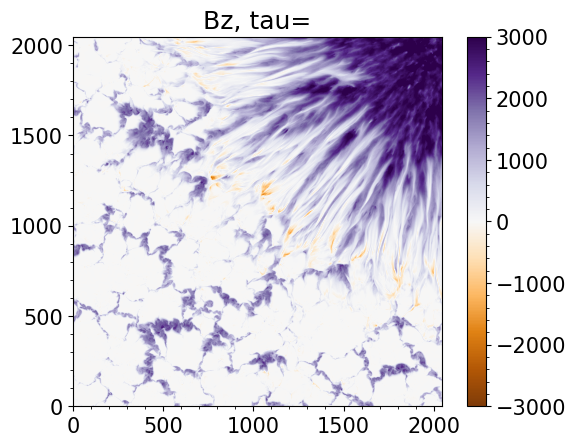

In [75]:
plt.imshow(Bz_interp[:,:,17].T,origin='lower',cmap='PuOr',vmin=-3000,vmax=3000)
plt.title('Bz, tau=')
plt.colorbar()

In [108]:
atm = None

In [ ]:
model3 = fits.open('/dat/xenosh/Full_simulation/stokes_inverted_all.fits')[0].data
syn_out3 = fits.open('/dat/xenosh/Full_simulation/stokes_inverted_all.fits')[1].data

In [ ]:
Bz3 = model3[:,:,0]*np.cos(model3[:,:,1])

In [ ]:
plt.imshow(Bz3.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()

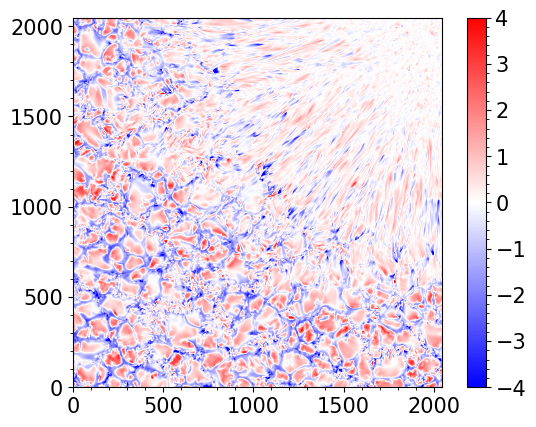

In [33]:
plt.imshow(model[:,:,3].T, origin='lower',cmap='bwr',vmin=-4,vmax=4)
plt.colorbar()

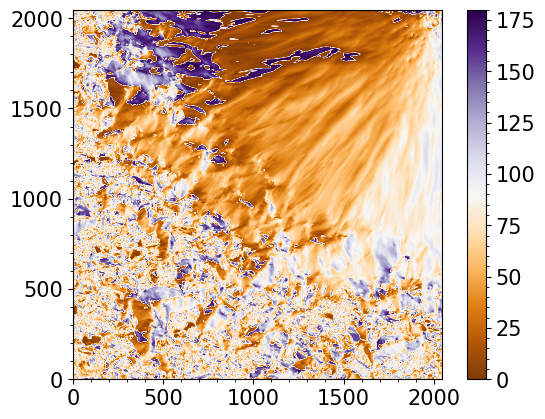

In [39]:
plt.imshow(model[:,:,2].T*180./np.pi,origin='lower',cmap='PuOr')
plt.colorbar()

In [78]:
    model0 = fits.open('/dat/xenosh/Full_simulation/stokes_full_converted_inverted_6173.fits')[0].data

In [84]:
Bz_new = model0[:,:,0]*np.cos(model0[:,:,1])
Bh_new = model0[:,:,0]*np.sin(model0[:,:,1])

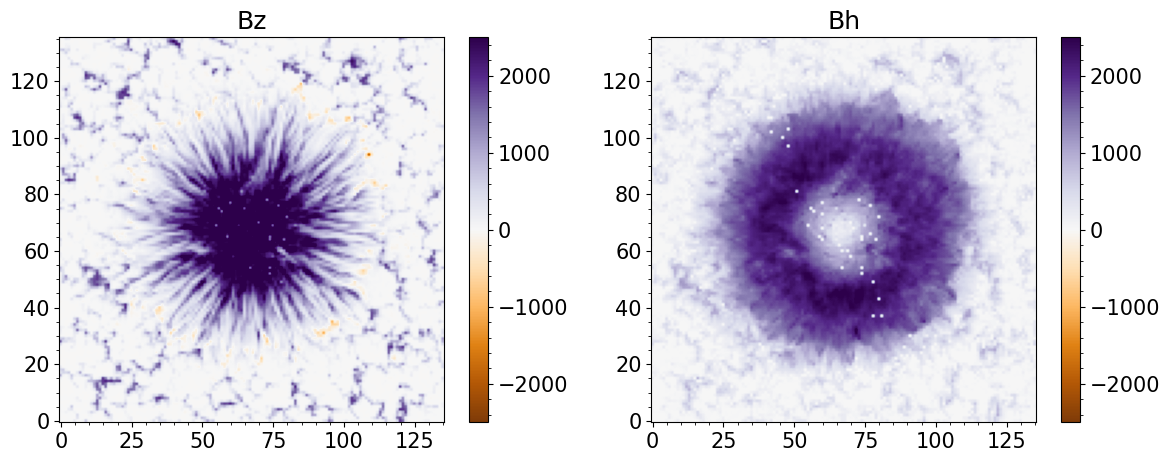

In [125]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(Bz_new.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bz')
plt.colorbar()
plt.subplot(122)
plt.imshow(Bh_new.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bh')
plt.colorbar()

In [126]:
np.mean(np.abs(Bz_new))

533.7359741145207

In [127]:
np.mean(np.abs(bz[8:-8,8:-8]))

565.7470019578551

In [141]:
np.std(stokes[:30,:30,0,0])

0.11676305450253273

In [255]:
stokes=fits.open('/dat-old/xenosh/Full_simulation/stokes_full_converted.fits')[0].data
stokes.shape

(136, 136, 4, 101)

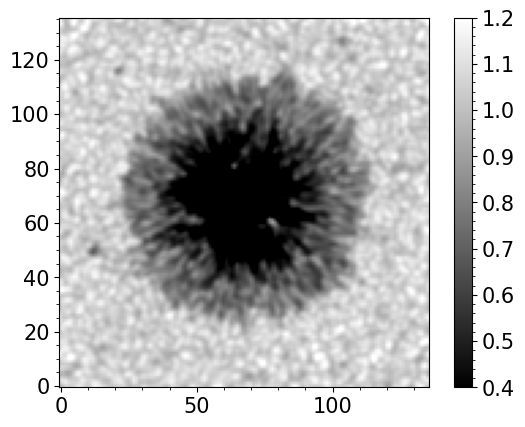

In [299]:
plt.imshow(stok[:,:,0,10].T,origin='lower',cmap='gray',vmin=0.4,vmax=1.2)
plt.colorbar()

In [214]:
np.std(stokes[:,:,0,10])

0.2796739053847855

In [102]:
s1 = Bh_new[:68,:68]
s2 = Bh_new[:68,68:]
s3 = Bh_new[68:,:68]
s4 = Bh_new[68:,68:]

In [103]:
Bh_new = np.append(np.append(s1,s2,axis=0),np.append(s3,s4,axis=0),axis=1)

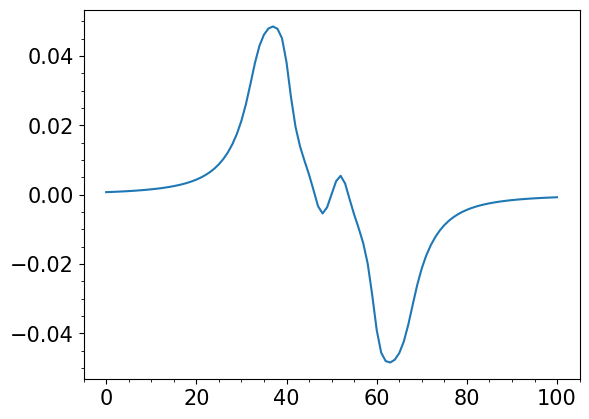

In [131]:
plt.plot(stokes[55,69,3,:])

In [122]:
np.argwhere(Bh_new[30:80,30:80]==0)

array([[25, 39],
       [26, 45],
       [27, 44],
       [29, 35],
       [30, 34],
       [30, 38],
       [30, 43],
       [30, 47],
       [36, 32],
       [37, 24],
       [37, 30],
       [39, 30],
       [40, 28],
       [40, 40],
       [41, 38],
       [43, 48],
       [44, 22],
       [44, 24],
       [44, 34],
       [44, 35],
       [47, 36],
       [47, 46],
       [48,  7],
       [48, 19],
       [49, 34]])

In [129]:
Bh_new[30+25,30+39]

0.0

In [346]:
stok = fits.open('/dat-old/xenosh/Full_simulation/stokes_full_converted_PSF.fits')[0].data

In [263]:
stok.shape

(136, 136, 4, 302)

In [268]:
np.std(stok[:20,:20,0,10])

0.05457411129622638

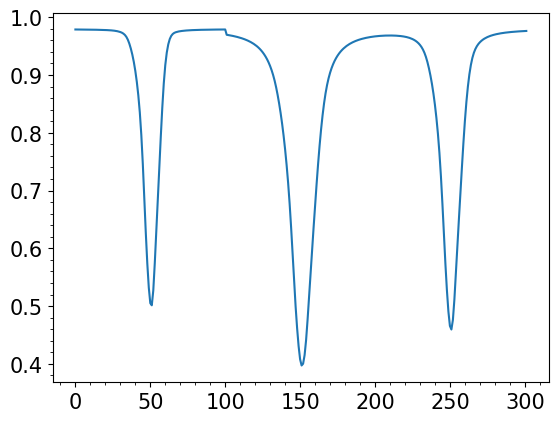

In [265]:
plt.plot(stok[0,0,0,:])

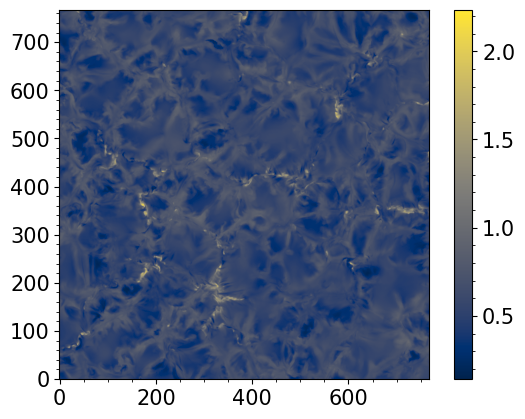

In [222]:
plt.imshow(stok[:,:,0,26].T,origin='lower',cmap='cividis')
plt.colorbar()

In [186]:
np.std(stok[:,:,0,10])

0.05057559541856823

In [166]:
stok2 = fits.open('/home/xenosh/codes/data/qs_ph_disk_center_synth_converted_0.5.fits')[0].data

In [167]:
np.std(stok2[:,:,0,50])

0.08340430364593632

In [157]:
np.std(stok2[:,:,0,50])

0.06548654387939823

In [231]:
stok2 = fits.open('/home/xenosh/codes/data/qs_ph_disk_center_synth.hinodewvl_converted_0.2_dx352.fits')[0].data

In [229]:
b = np.sum(stok[10:-10,10:-10,0,10].reshape(34,22,34,22),axis=(1,3))/(22.*22.)

In [230]:
np.std(b)

0.11569265

In [193]:
b.shape

(34, 34)

In [223]:
stok3 = fits.open('/home/xenosh/codes/data/qs_ph_disk_center_synth.hinodewvl_converted_0.1_dx352_cb.fits')[0].data

In [225]:
np.std(stok3[:,:,0,10])

0.03953674931859854

In [217]:
stok3.shape

(34, 34, 4, 112)

In [233]:
stok4 = fits.open('/home/xenosh/codes/data/qs_ph_disk_center_synth.hinodewvl_converted_0.5_dx352.fits')[0].data

In [226]:
np.std(stok4[:,:,0,10])

0.11372050245163413

In [227]:
stok5 = fits.open('/home/xenosh/codes/data/qs_ph_disk_center_synth.hinodewvl_converted_0.14_dx352.fits')[0].data

In [228]:
np.std(stok5[:,:,0,10])

0.0535630193717495

In [250]:
x = [0.1,0.14,0.2,0.5]
y = [np.std(stok3[:,:,0,10]),np.std(stok5[:,:,0,10]),np.std(stok2[:,:,0,10]),np.std(stok4[:,:,0,10])]

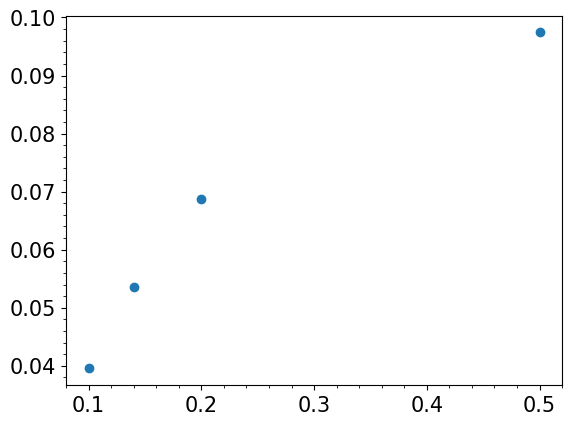

In [252]:
plt.scatter(x,y)

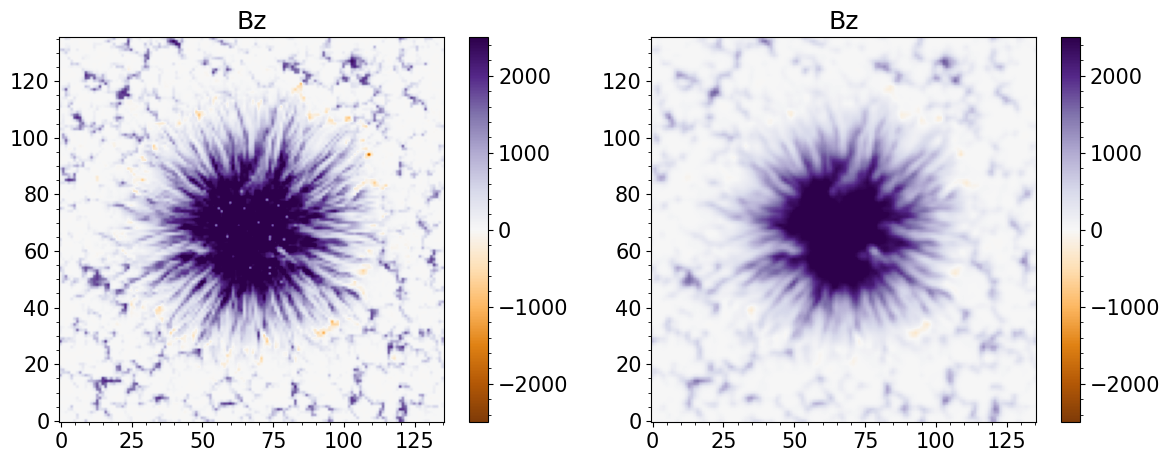

In [261]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(Bz_new.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bz')
plt.colorbar()
plt.subplot(122)
plt.imshow(Bz.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bz')
plt.colorbar()

In [291]:
print('<Bz> PSf:',np.mean(Bz), '  ',(np.mean(Bz)-np.mean(bz))/np.mean(bz)*100,'%')
print('<Bz> airy disk:',np.mean(Bz_new),'  ',(np.mean(Bz_new)-np.mean(bz))/np.mean(bz)*100,'%')
print('<Bz> simulation:',np.mean(bz))
print('<|Bz|> PSF:',np.mean(np.abs(Bz)),'  ',(np.mean(np.abs(Bz))-np.mean(np.abs(bz)))/np.mean(np.abs(bz))*100,'%')
print('<|Bz|> airy disk:',np.mean(np.abs(Bz_new)),'  ',(np.mean(np.abs(Bz_new))-np.mean(np.abs(bz)))/np.mean(np.abs(bz))*100,'%')
print('<|Bz|> simulation:',np.mean(np.abs(bz)))

<Bz> PSf: 489.26502695931345    -9.329726628124298 %
<Bz> airy disk: 523.899805748345    -2.9112321763696714 %
<Bz> simulation: 539.6090788792909
<|Bz|> PSF: 490.99349326196125    -12.745857195648947 %
<|Bz|> airy disk: 533.7359741145207    -5.150117986673988 %
<|Bz|> simulation: 562.7165398471798


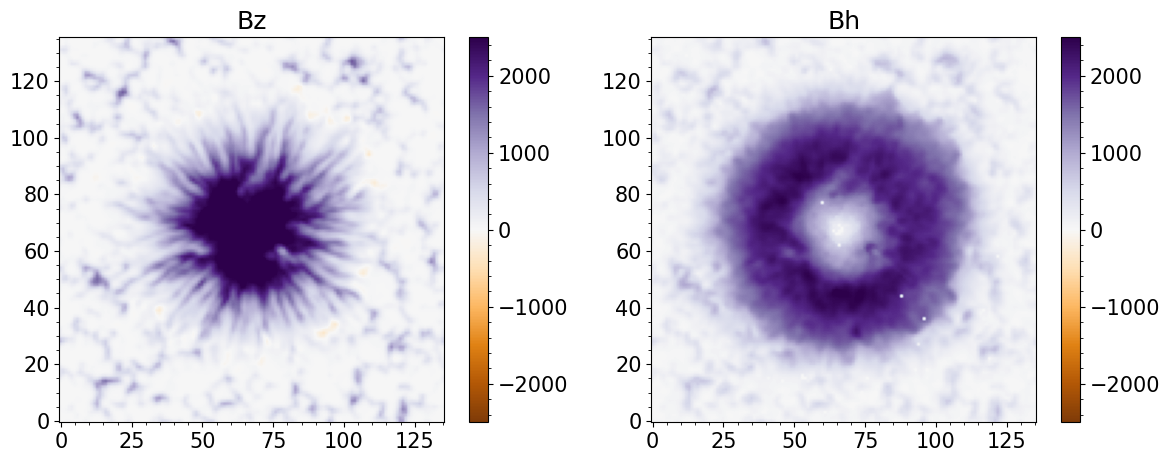

In [355]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(Bz.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bz')
plt.colorbar()
plt.subplot(122)
plt.imshow(Bh.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.title('Bh')
plt.colorbar()

In [302]:
np.mean(np.abs(Bz[60:70,60:70]))

2816.987819114073

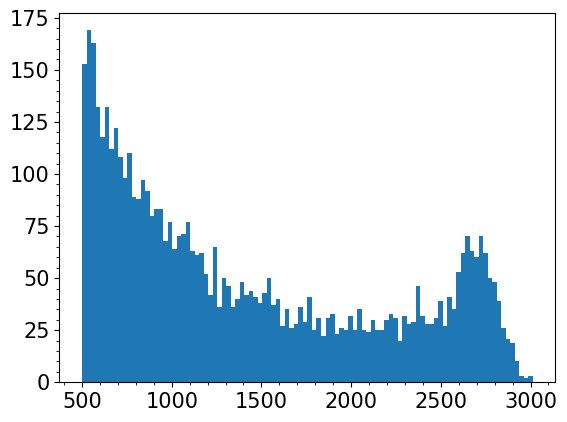

In [312]:
plt.hist(Bz[Bz>500],bins=100)
plt.show()

In [356]:
Bzz = Bz.copy()

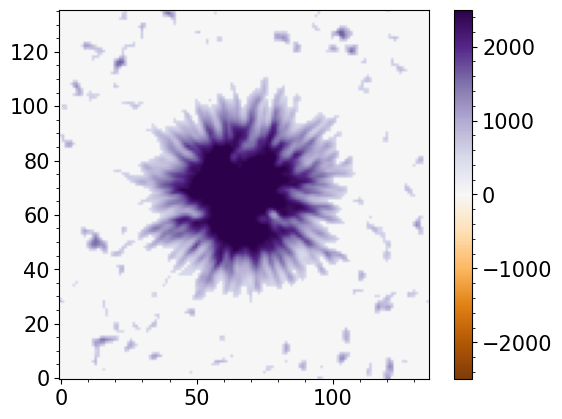

In [357]:
Bzz[Bzz<500] = 0
plt.imshow(Bzz.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()

In [316]:
Ic = np.mean(stok[:10,:10,0,:10])
Ic

1.0506817107593105

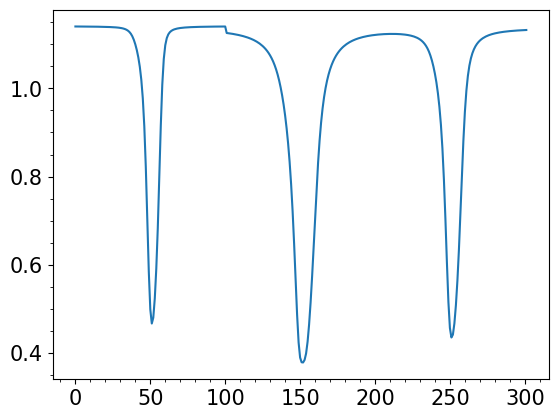

In [317]:
plt.plot(stok[10,10,0,:])

In [322]:
ic = np.mean(stok[:,:,0,:10],axis=2)
ic.shape

(136, 136)

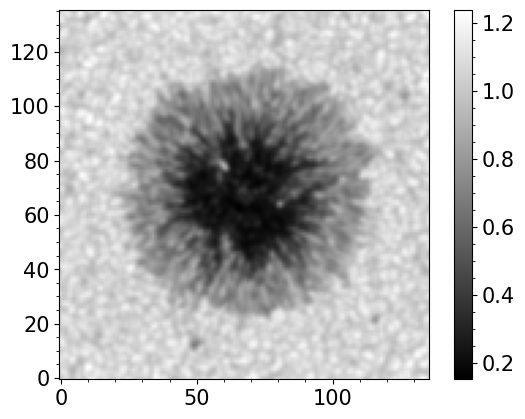

In [327]:
plt.imshow(ic,origin='lower',cmap='gray')
plt.colorbar()

In [348]:
test = stok.copy()

In [349]:
for i in range(136):
    for j in range(136):
        if (ic[i,j] < Ic*0.55 or ic[i,j] > Ic*0.95):
            test[i,j,:,:] = 1

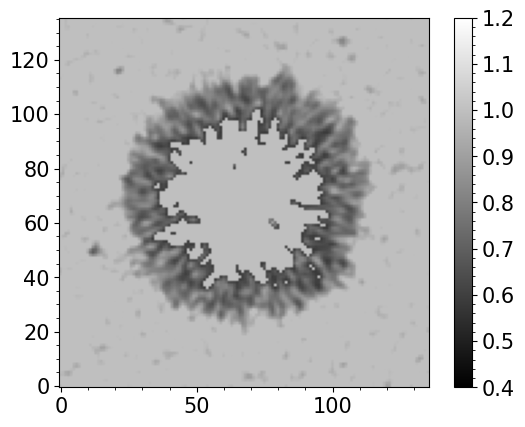

In [352]:
plt.imshow(test[:,:,0,10].T,origin='lower',cmap='gray',vmin=0.4,vmax=1.2)
plt.colorbar()